<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.108276,200.731969,200.688462,0.043507
1,0.0,1.0,57.329540,67.934475,53.739469,0.227034,189.230518,188.983333,0.247185
2,0.0,2.0,45.215694,51.000161,43.520343,0.036491,149.772689,149.814707,-0.042018
3,0.0,3.0,69.375325,41.455180,64.082408,-0.579229,184.333684,184.995855,-0.662171
4,0.0,4.0,87.837297,72.508079,90.676124,-0.050479,260.971021,260.915202,0.055819
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,0.260101,212.333536,212.071680,0.261856
19996,999.0,16.0,62.971081,59.155436,22.434296,0.317869,154.878682,154.544792,0.333890
19997,999.0,17.0,37.323768,53.799677,46.207262,0.011111,147.341819,147.311332,0.030487
19998,999.0,18.0,42.204721,36.635143,97.635290,0.057905,186.533059,186.426178,0.106881


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.731969  200.688462  0.043507
      1.0    57.329540  67.934475  53.739469  ...  189.230518  188.983333  0.247185
      2.0    45.215694  51.000161  43.520343  ...  149.772689  149.814707 -0.042018
      3.0    69.375325  41.455180  64.082408  ...  184.333684  184.995855 -0.662171
      4.0    87.837297  72.508079  90.676124  ...  260.971021  260.915202  0.055819
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   43.382293  66.593046  92.098096  ...  212.333536  212.071680  0.261856
      16.0   62.971081  59.155436  22.434296  ...  154.878682  154.544792  0.333890
      17.0   37.323768  53.799677  46.207262  ...  147.341819  147.311332  0.030487
      18.0   42.204721  36.635143  97.635290  ...  186.533059  186.426178  0.106881
      19.0   88.522268  25.681428  82.018999  ...  206.004185  206.146450 -0.142266

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.731969  200.688462  0.043507
      1.0    57.329540  67.934475  53.739469  ...  189.230518  188.983333  0.247185
      2.0    45.215694  51.000161  43.520343  ...  149.772689  149.814707 -0.042018
      3.0    69.375325  41.455180  64.082408  ...  184.333684  184.995855 -0.662171
      4.0    87.837297  72.508079  90.676124  ...  260.971021  260.915202  0.055819
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   43.382293  66.593046  92.098096  ...  212.333536  212.071680  0.261856
      16.0   62.971081  59.155436  22.434296  ...  154.878682  154.544792  0.333890
      17.0   37.323768  53.799677  46.207262  ...  147.341819  147.311332  0.030487
      18.0   42.204721  36.635143  97.635290  ...  186.533059  186.426178  0.106881
      19.0   88.522268  25.681428  82.018999  ...  206.004185  206.146450 -0.142266

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.108276,200.731969,200.688462,0.043507
1,0.0,1.0,57.329540,67.934475,53.739469,0.227034,189.230518,188.983333,0.247185
2,0.0,2.0,45.215694,51.000161,43.520343,0.036491,149.772689,149.814707,-0.042018
3,0.0,3.0,69.375325,41.455180,64.082408,-0.579229,184.333684,184.995855,-0.662171
4,0.0,4.0,87.837297,72.508079,90.676124,-0.050479,260.971021,260.915202,0.055819
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,0.260101,212.333536,212.071680,0.261856
19996,999.0,16.0,62.971081,59.155436,22.434296,0.317869,154.878682,154.544792,0.333890
19997,999.0,17.0,37.323768,53.799677,46.207262,0.011111,147.341819,147.311332,0.030487
19998,999.0,18.0,42.204721,36.635143,97.635290,0.057905,186.533059,186.426178,0.106881


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.731969  200.688462  0.043507
      1.0    57.329540  67.934475  53.739469  ...  189.230518  188.983333  0.247185
      2.0    45.215694  51.000161  43.520343  ...  149.772689  149.814707 -0.042018
      3.0    69.375325  41.455180  64.082408  ...  184.333684  184.995855 -0.662171
      4.0    87.837297  72.508079  90.676124  ...  260.971021  260.915202  0.055819
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   43.382293  66.593046  92.098096  ...  212.333536  212.071680  0.261856
      16.0   62.971081  59.155436  22.434296  ...  154.878682  154.544792  0.333890
      17.0   37.323768  53.799677  46.207262  ...  147.341819  147.311332  0.030487
      18.0   42.204721  36.635143  97.635290  ...  186.533059  186.426178  0.106881
      19.0   88.522268  25.681428  82.018999  ...  206.004185  206.146450 -0.142266

[20000 rows x 7 columns]

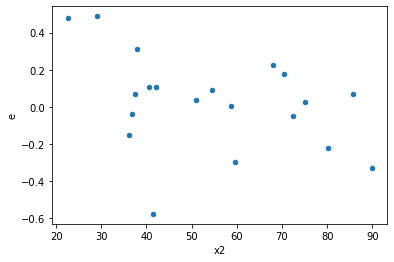

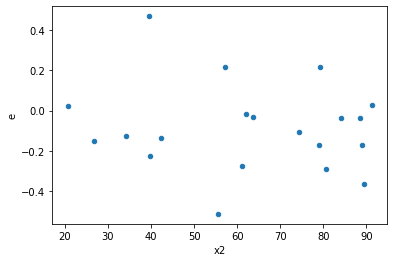

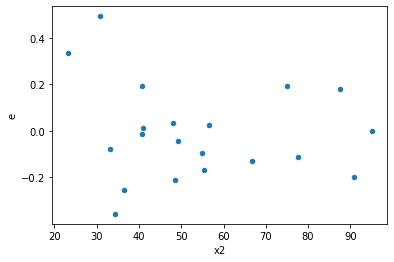

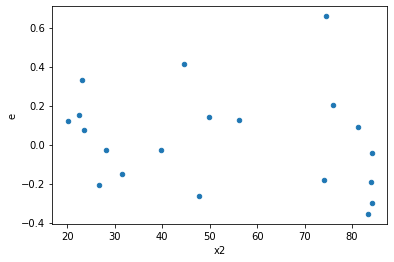

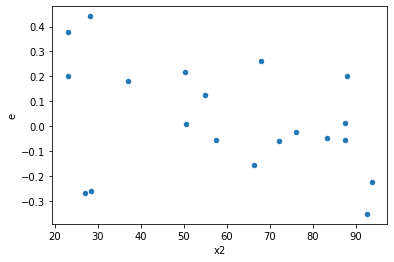

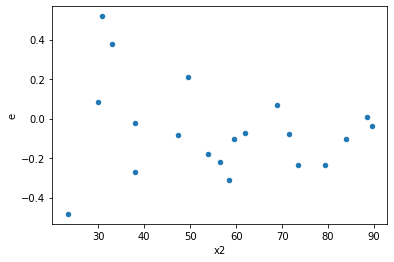

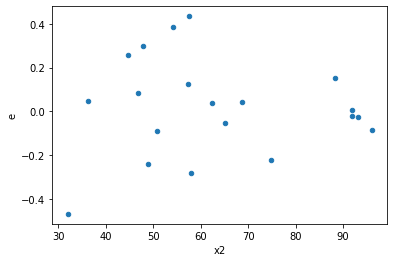

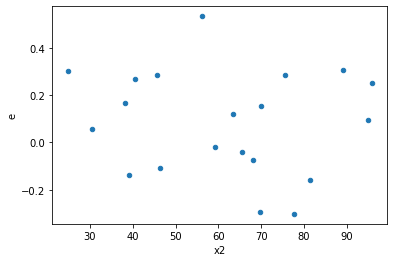

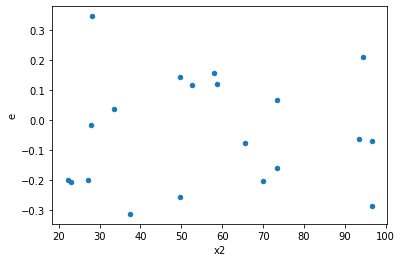

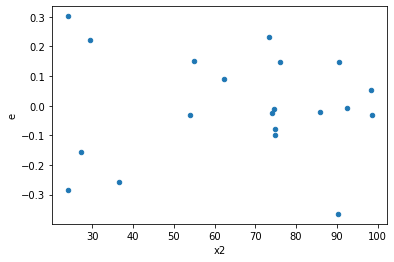

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,5.0,0.33851323279698503,0.5032353927007026,0.037612581421887226,0.10064707854014052,2.6758886185241395,0.2908443691039666,0.8545778154480167,0.1454221845519833,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,0.16036153227475453,0.5044062448035137,0.032072306454950905,0.05604513831150152,1.7474620476772726,0.43981646428487586,0.7800917678575621,0.21990823214243793,Reject001=1 : Homoscedasticity
2.0,1.0,13.0,1.9387045606711586e-26,0.6092350495705505,1.9387045606711586e-26,0.04686423458235004,2.4172963499980704e+24,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
3.0,5.0,9.0,0.12870537929485712,0.9014985840894779,0.025741075858971424,0.10016650934327533,3.891310133735717,0.07442908569497253,0.9627854571525137,0.037214542847486265,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,0.17110623699643,0.3237131956596049,0.02138827962455375,0.05395219927660081,2.5225123396396816,0.2758372739508612,0.8620813630245694,0.1379186369754306,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,0.19390389904034627,0.26390935248479597,0.027700557005763755,0.03770133606925657,1.361031695550812,0.6944950173632338,0.6527524913183831,0.3472475086816169,Reject001=1 : Homoscedasticity
11.0,5.0,9.0,0.19517638817174807,0.47475378197847123,0.039035277634349615,0.05275042021983014,1.351352505135296,0.6534370700402121,0.6732814649798939,0.32671853502010606,Reject001=1 : Homoscedasticity
13.0,6.0,8.0,0.15763187169961348,0.5489691308599998,0.026271978616602246,0.06862114135749997,2.611951781741163,0.20953259856007955,0.8952337007199602,0.10476629928003978,Reject001=1 : Homoscedasticity
14.0,6.0,8.0,0.1111876206979086,0.2017067044872891,0.0185312701163181,0.02521333806091114,1.3605833762419233,0.66863083665499,0.665684581672505,0.334315418327495,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,0.33851323279698503,0.5032353927007026,0.037612581421887226,0.10064707854014052,2.6758886185241395,0.2908443691039666,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,0.16036153227475453,0.5044062448035137,0.032072306454950905,0.05604513831150152,1.7474620476772726,0.43981646428487586,Reject001=1 : Homoscedasticity
2.0,1.0,13.0,1.9387045606711586e-26,0.6092350495705505,1.9387045606711586e-26,0.04686423458235004,2.4172963499980704e+24,0.0,Reject001=0 : Heteroscedasticity
3.0,5.0,9.0,0.12870537929485712,0.9014985840894779,0.025741075858971424,0.10016650934327533,3.891310133735717,0.07442908569497253,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.47856180304007007,0.20487219836222964,0.06836597186286715,0.02926745690888995,0.4280997711492567,0.285496286951161,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.5959101639495916,0.06069374957810005,0.09931836065826527,0.0075867186972625065,0.07638787679316311,0.005621276029865909,Reject001=0 : Heteroscedasticity
6.0,8.0,6.0,0.17110623699643,0.3237131956596049,0.02138827962455375,0.05395219927660081,2.5225123396396816,0.2758372739508612,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,0.19390389904034627,0.26390935248479597,0.027700557005763755,0.03770133606925657,1.361031695550812,0.6944950173632338,Reject001=1 : Homoscedasticity
8.0,4.0,10.0,0.14499108713414838,0.31666531258811614,0.036247771783537094,0.031666531258811616,0.8736131822920444,0.9743634383171894,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      916
Reject001=0 : Heteroscedasticity     84
Name: Result_test, dtype: int64